In [70]:
import mysql.connector
import os
import pandas as pd
import bd as base
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv

from scipy.stats import spearmanr, kendalltau, chi2_contingency


load_dotenv()

True

## Conexion y obtencion de datos

In [68]:
conexion2 = base.DB
conexion2.start()

sql = 'SELECT * FROM get_valores;'

lista = []
 
val = conexion2.query(sql,lista)
print("Informacion Obtenida")
print(len(val))

conexion2.save()
conexion2.fin()


Informacion Obtenida
3632


In [13]:
df = pd.DataFrame(val)
print(df.shape[0])


df = df.rename(columns={0 :'fecha'})
df = df.rename(columns={1 :'region'})
df = df.rename(columns={2 :'nuevos_casos'})
df = df.rename(columns={3 :'acumulado_casos'})
df = df.rename(columns={4 :'nuevas_muertes'})
df = df.rename(columns={5 :'acumulado_muertes'})
df = df.rename(columns={6 :'departamento'})
df = df.rename(columns={7 :'municipio'})
df = df.rename(columns={8 :'poblacion'})
df = df.rename(columns={9 :'valor'})


3632


## EDA monovariable 1

### Datos Cuantitativos 1.1

#### CALCULOS DE NUEVAS MUERTES 1.1.1

In [15]:
#CALCULOS DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].describe() 

print(f3)



count    3573.000000
mean       23.830954
std        14.492322
min         1.000000
25%        12.000000
50%        21.000000
75%        34.000000
max        61.000000
Name: nuevas_muertes, dtype: float64


#### CALCULOS DE MUERTES ACUMULADAS 1.1.2

In [16]:
#CALCULOS DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].describe() 

print(f3)


count    3629.000000
mean     2284.009369
std      1324.469195
min         1.000000
25%      1139.000000
50%      2389.000000
75%      3302.000000
max      4803.000000
Name: acumulado_muertes, dtype: float64


#### CALCULOS DE POBLACION MUNICIPIOS 1.1.3

In [17]:
#CALCULOS DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].describe() 

print(f4)


count    2.990000e+02
mean     5.397280e+04
std      8.567421e+04
min      2.563000e+03
25%      1.990500e+04
50%      3.589500e+04
75%      6.199650e+04
max      1.205668e+06
Name: poblacion, dtype: float64


## Histogramas y Diagrama de cajas

#### NUEVAS MUERTES CON CUARTILES 1.1.4

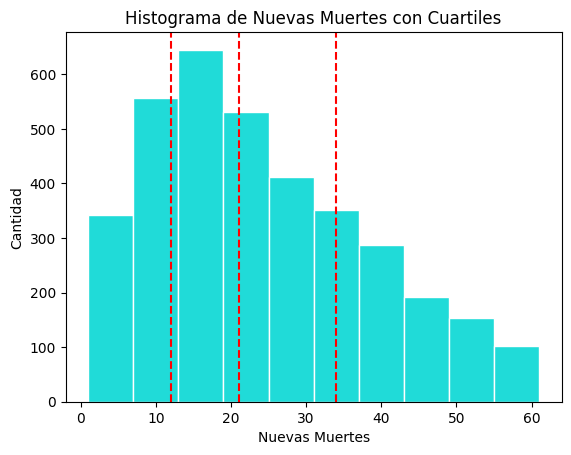

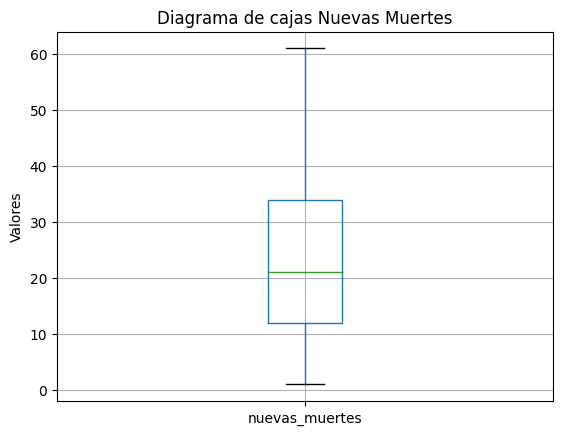

In [283]:
#HISTOGRAMA Y CAJAS DE NUEVAS MUERTES CON CUARTILES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].quantile([0.25, 0.5, 0.75])

plt.hist(f2['nuevas_muertes'], edgecolor = "white",color ='#20dbd8')

# Agregar líneas de cuartiles
for quartile in f3:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Nuevas Muertes con Cuartiles')
plt.xlabel('Nuevas Muertes')
plt.ylabel('Cantidad')
plt.show()


f2.boxplot()
plt.title('Diagrama de cajas Nuevas Muertes')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()



Se observo que el 50% de los datos es menor a 21 muertes por dia , ademas se observo que el el 25% de los valores mas alto es mayor a 35 muertes nuevas con un maximo de 60 muertes nuevas por dia ,donde la mayor concentracion de la informacion esta distribuida del lado izquierdo de la grafica , por lo que la informacion posee un sesgo descendente del lado derecho y donde la mayor concentracion de datos esta entre el primer y segundo cuartil , tambien en el diagrama de cajas se refleja el sesgo de la informacion desplazado mas hacia abajo fuera del centro

#### MUERTES ACUMULADAS CON CUARTILES 1.1.5

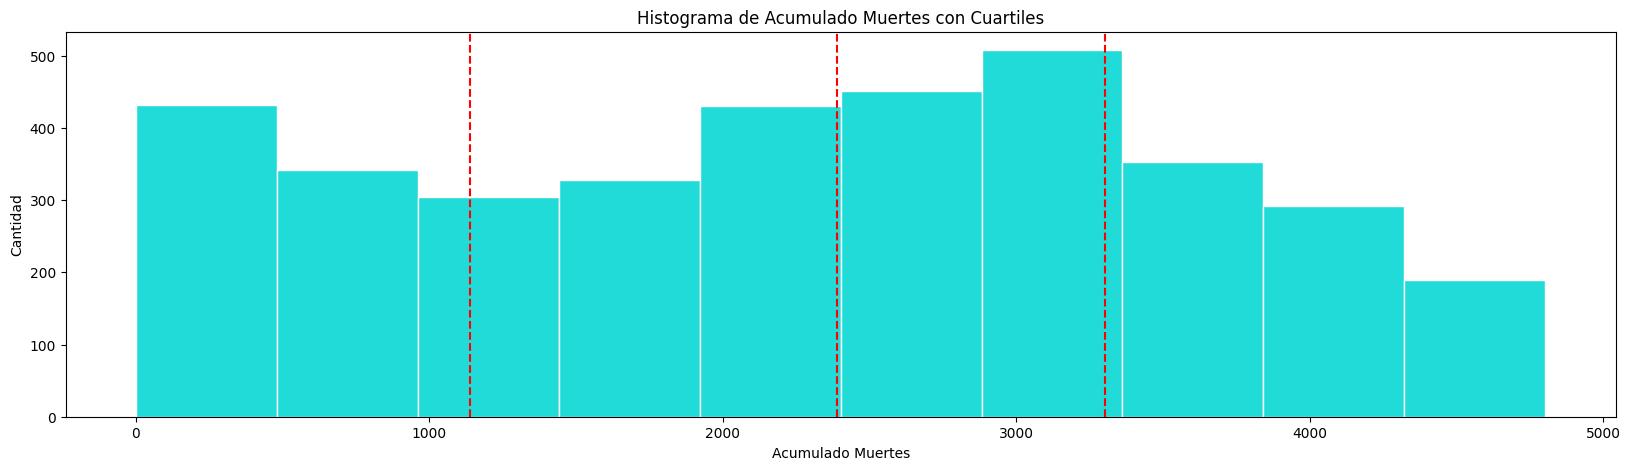

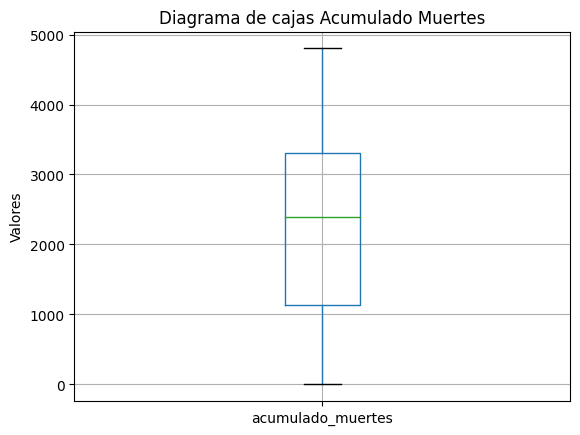

In [282]:
#HISTOGRAMA Y CAJAS DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(20, 5))
plt.hist(f2['acumulado_muertes'], edgecolor = "white",color ='#20dbd8')

# Agregar líneas de cuartiles
for quartile in f3:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Acumulado Muertes con Cuartiles')
plt.xlabel('Acumulado Muertes')
plt.ylabel('Cantidad')
plt.show()

f2.boxplot()
plt.title('Diagrama de cajas Acumulado Muertes')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()


Se observo para el analisis de acumulado de muertes que los datos estan mas distribuidos de manera uniforme por lo que el 50% de los datos esta casi en el centro de la grafica , de igual forma se tiene una pequena concentracion de datos en el primer cuartil y entre el segundo y tercero , donde el valor maximo registrado se encuentra por los 4600 con respecto a las muertes acumuladas , esto se refleja de igual forma en el diagrama de cajas donde se ve una concentracion uniforme en el centro

#### POBLACION MUNICIPIOS CON CUARTILES 1.1.6

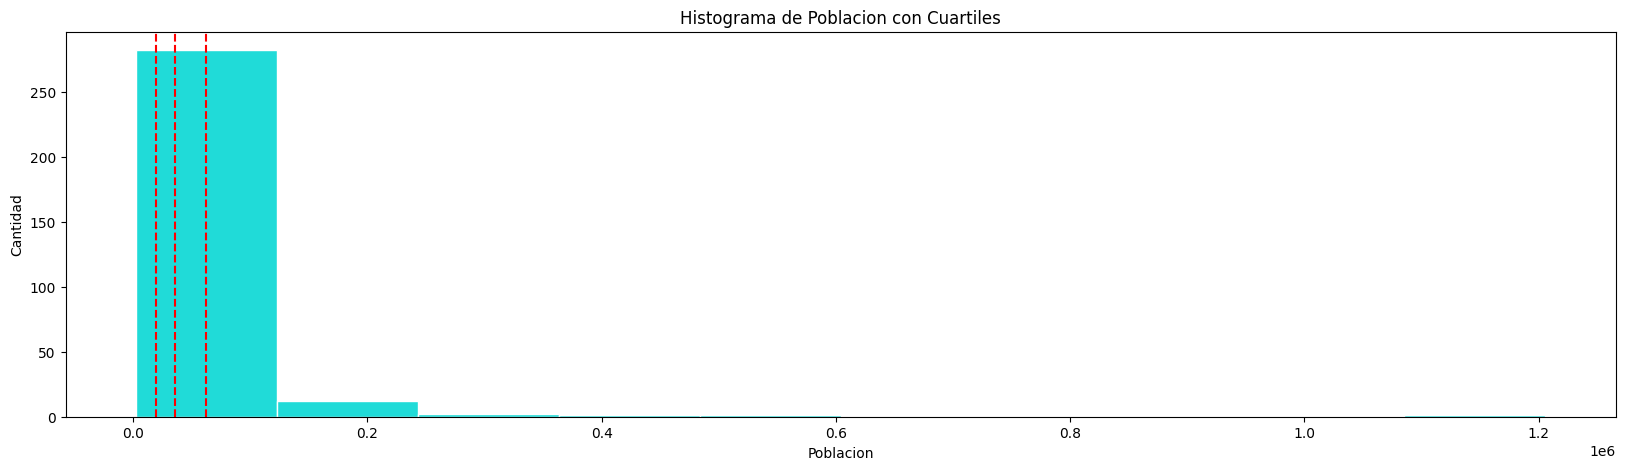

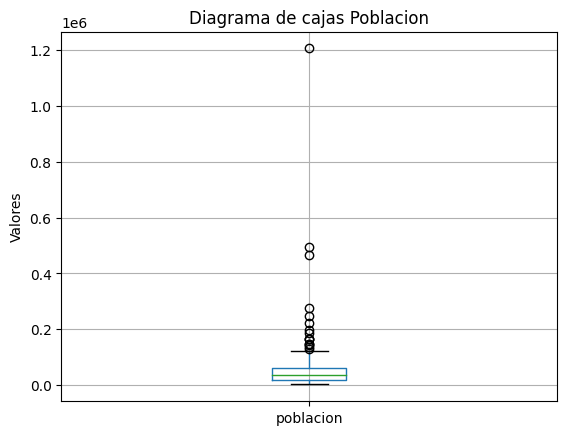

In [281]:
#HISTOGRAMA Y CAJAS DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(20, 5))
plt.hist(f3['poblacion'], edgecolor = "white",color ='#20dbd8')

# Agregar líneas de cuartiles
for quartile in f4:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Poblacion con Cuartiles')
plt.xlabel('Poblacion')
plt.ylabel('Cantidad')
plt.show()

f3.boxplot()
plt.title('Diagrama de cajas Poblacion')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()


Se observo para el diagrama de poblacion un sesgo muy marcado donde el valor atipico de la poblacion de la capital hace que la mayoria de los registros esta relacionada con la mayoria de 
departamentos y municipios que no sean el centro de guatemala , ya que como sabemos la capital tiene la mayor concentracion de poblacion , este sesgo tambien se marca bien en el 
diagrama de cajas donde esta muy hacia abajo ,por lo que si es necesario se podria quitar el valor de la capital para analizar la demas informacion que es mas representativa

### Datos cualitativos 1.2

#### DEPARTAMENTOS 1.2.1

10791


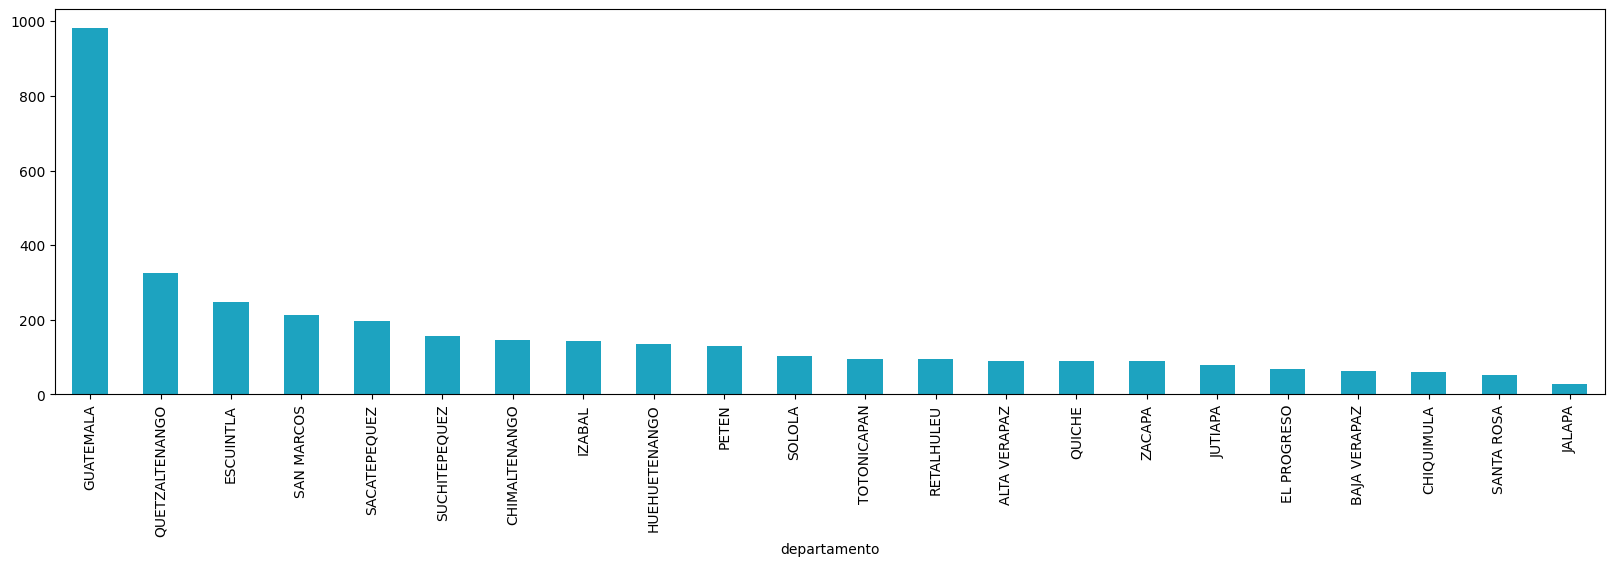

In [268]:
#BARRAS DEPARTAMENTOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

f1 = dc[(dc['poblacion'] > 0) ]

f1.groupby('departamento')['departamento'].size().sort_values(ascending=False).plot(kind='bar', color='#1da3c0' ,figsize=(20, 5))

plt.show()




Se observo para el analisis de departamentos que la mayoria de registros esta concentrada para el departamento de guatemala , seguido por el de quetzaltenango y asi mismo por el de escuintla
teniendo en ultimo lugar jalapa , para los 22 departamentos de guatemala

#### MUNICIPIOS 1.2.2

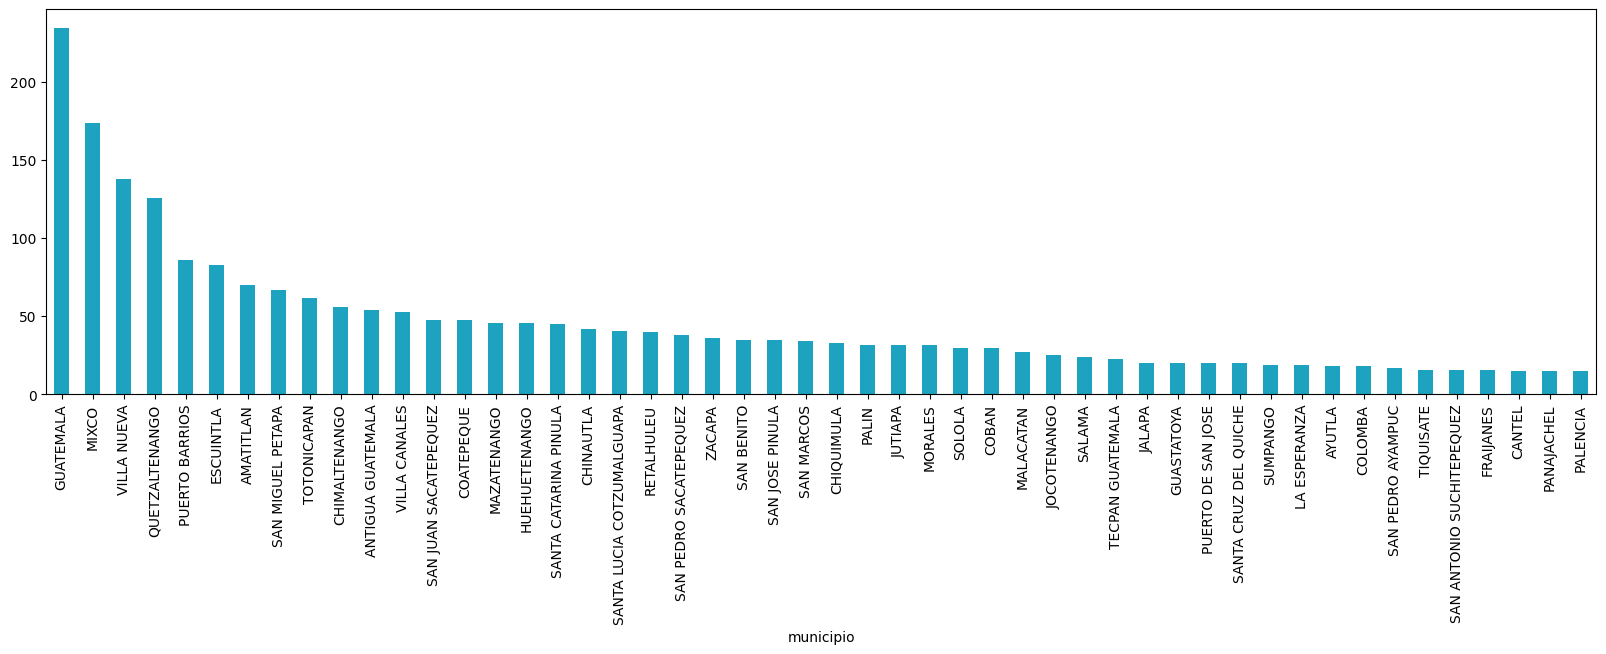

In [269]:
#BARRAS MUNICIPIOS 

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)
f1 = dc[(dc['poblacion'] > 0) ]
f1.groupby('municipio')['municipio'].size().sort_values(ascending=False).head(50).plot(kind='bar', color='#1da3c0' ,figsize=(20, 5))
 
 

plt.show()


Se observo para el analisis de municipios que de igual forma , para el municipio de guatemala le pertenecen la mayoria de registros , seguido del municipio de mixco y asi mismo el de villanueva , como vemos estos pertenecen al departemento de guatemala , y este era el que punteaba como el departamento de mayor cantidad de registros

## EDA multivariable 2

### Datos cuantitativos 2.1

#### MUNICIPIOS VS NUEVAS CANTIDAD DE MUERTES 2.1.1

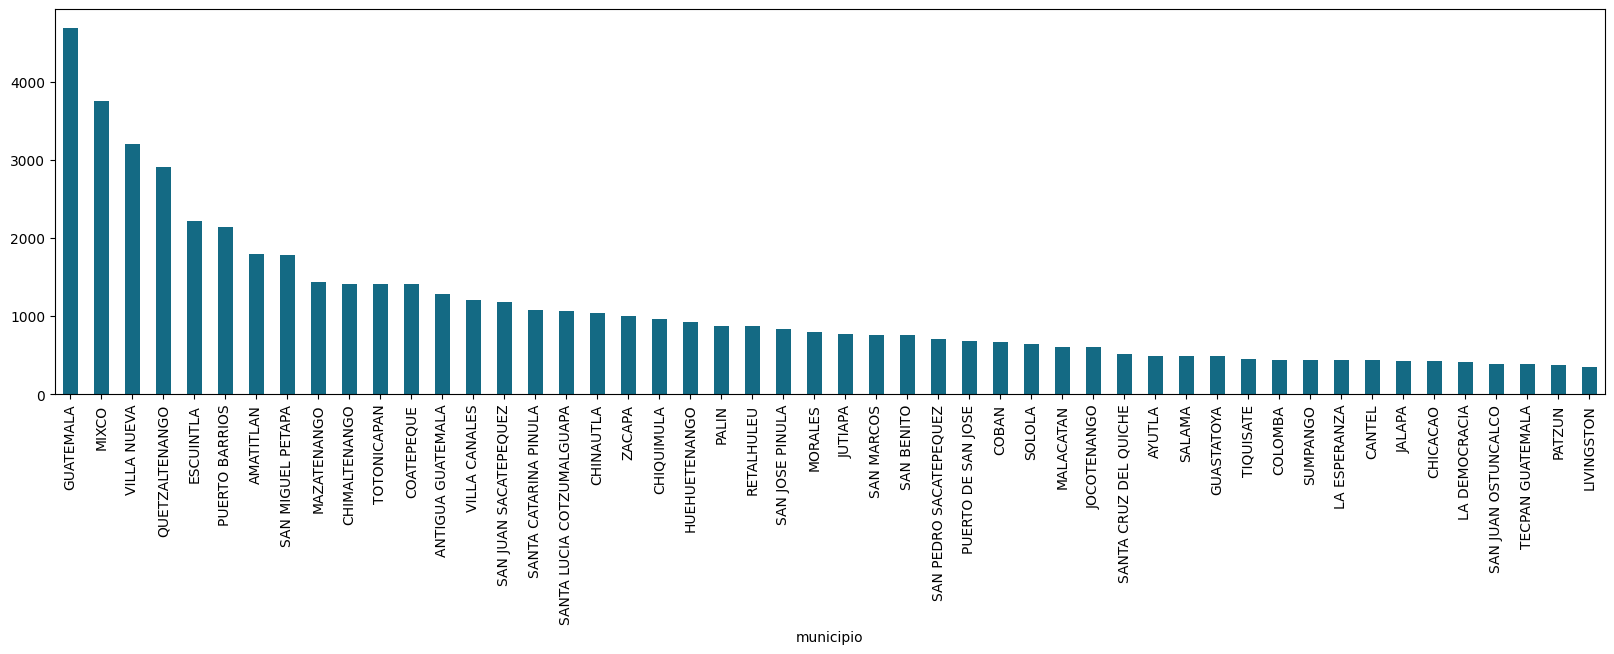

In [270]:
#MUNICIPIOS VS NUEVAS CANTIDAD DE MUERTES

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    #'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    #'departamento'
    #'poblacion'
    
    ], axis=1)

f1 = dc[(dc['poblacion'] > 0) ]
f1.groupby('municipio')['nuevas_muertes'].sum().sort_values(ascending=False).head(50).plot(kind='bar', color='#146a84' ,figsize=(20, 5))
 
 

plt.show()


Se puede observar que para la relacion entre municipios y la cantidad de nuevar muertes , tenemos que el municipio de guatemala lidera la grafica segido de mixco y luego el municipio de 
villanueva , estos tres pertenecen al departamento de guatemala,se puede ver que estos municipios mas adelante son los que tienen mayor poblacion,por lo que se puede ver la relacion al menos
con estos tres municipios a mayor poblacion mayor cantidad de nuevos casos 

#### DEPARTAMENTOS VS NUEVAS CANTIDAD DE MUERTES 2.1.2

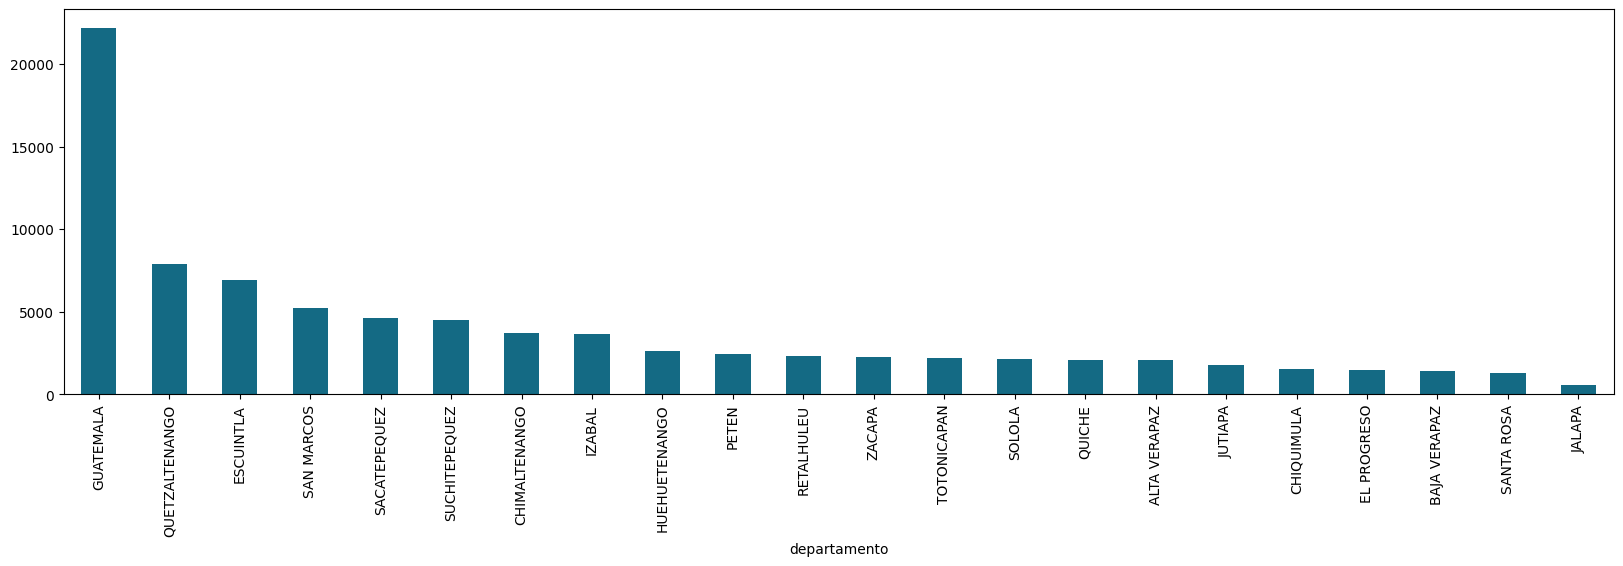

In [271]:
#DEPARTAMENTOS VS NUEVAS CANTIDAD DE MUERTES

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    #'nuevas_muertes',
    'municipio',
    'acumulado_muertes',
    'valor',
    #'departamento'
    #'poblacion'
    
    ], axis=1)

f1 = dc[(dc['poblacion'] > 0) ]
f1.groupby('departamento')['nuevas_muertes'].sum().sort_values(ascending=False).head(50).plot(kind='bar', color='#146a84' ,figsize=(20, 5))
 
 

plt.show()


Se puede observar que para los departamentos y los nuevos casos tenemos que el departamento de guatemala posee la mayor cantidad de nuevos casos ,de igual forma mas adelante
veremos que este es el departamento que tiene mayor poblacion de los demas , por lo que se relaciona la poblacion del departamento con el numero de nuevos casos 

#### MUNICIPIOS VS POBLACION 2.1.3

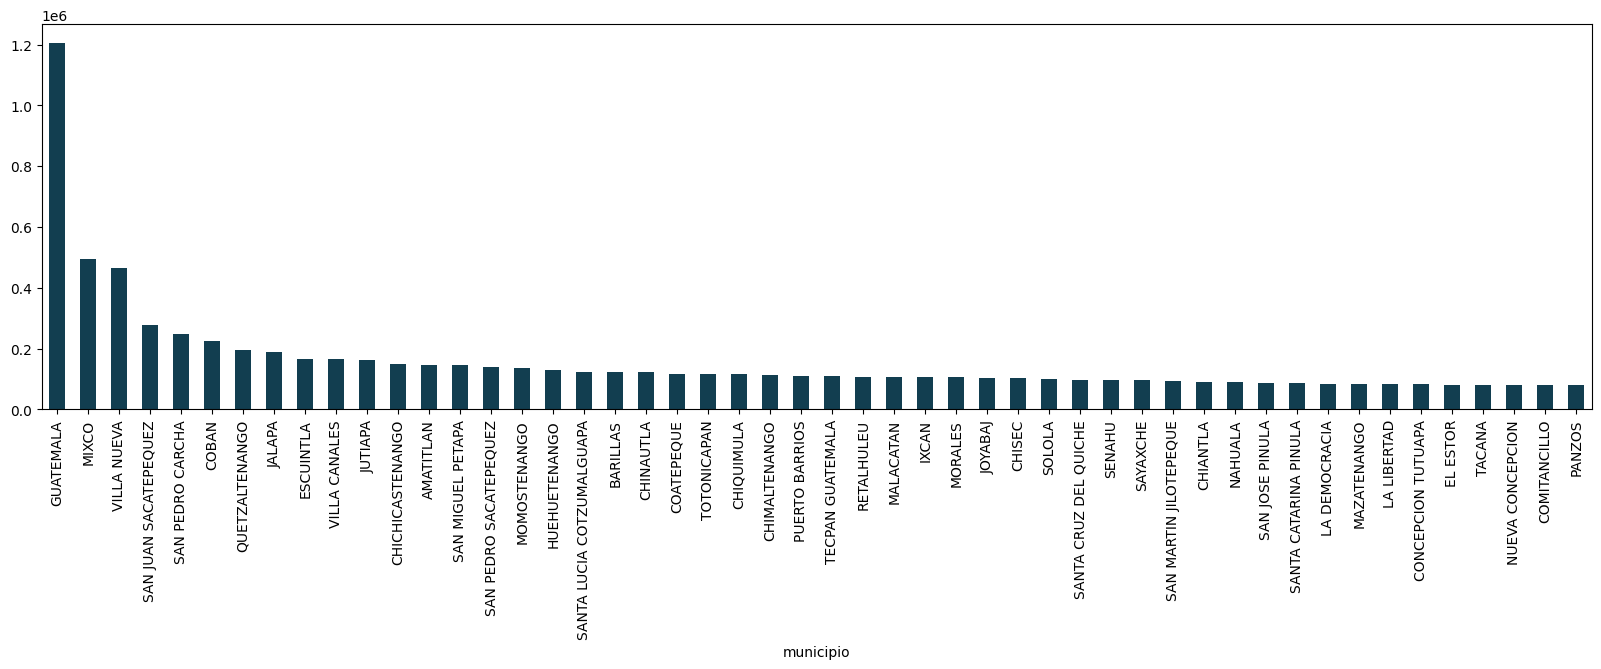

In [272]:
#MUNICIPIOS VS POBLACION

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    #'municipio',
    'acumulado_muertes',
    'valor',
    'departamento'
    #'poblacion'
    
    ], axis=1)

f1 = dc[(dc['poblacion'] > 0) ]
f1 = f1.drop_duplicates(subset=[ 'municipio', 'poblacion'])

f1.groupby('municipio')['poblacion'].sum().sort_values(ascending=False).head(50).plot(kind='bar', color='#123e50' ,figsize=(20, 5))

plt.show()


Se puede observar que precisamente los 3 primeros municipios que tienen la mayor cantidad de poblacion son los que tienen mas casos nuevos registrados , tambien podemos ver que
el municipio de guatemala con respecto a la poblacion tiene mucha diferencia con respecto a los demas , casi con una poblacion de 1.2 millones de personas , seguido por los otros dos
municipios con 500 mil habitantes ,una diferencia de 700 mil habitantes con los primeros dos

#### DEPARTAMENTOS VS POBLACION 2.1.4

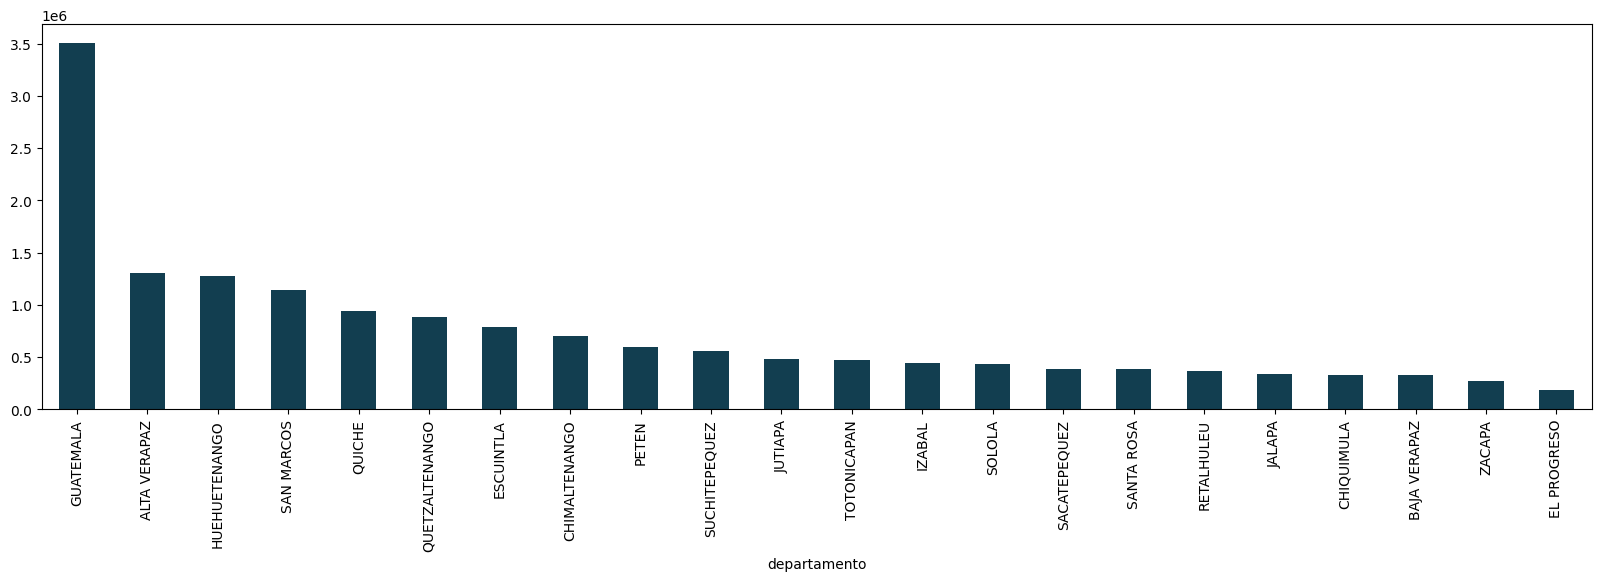

In [273]:
#DEPARTAMENTOS VS POBLACION

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'municipio',
    'acumulado_muertes',
    'valor',
    #'departamento'
    #'poblacion'
    
    ], axis=1)

f1 = dc[(dc['poblacion'] > 0) ]
f1 = f1.drop_duplicates(subset=[ 'departamento', 'poblacion'])

f1.groupby('departamento')['poblacion'].sum().sort_values(ascending=False).head(50).plot(kind='bar', color='#123e50' ,figsize=(20, 5))

plt.show()


Se puede observar que el departamento de guatemala lidera con respecto a la poblacion , tiene aproximadamente 3.5 millones de habitantes , y tiene una diferencia con el segundo por
2.1 millones de habitantes , por lo que si es una diferencia muy significativa , luego de eso , los demas departamentos tienen valores mas normalizados de entre 300 mil a 1.4 millones de
habitantes 

#### MUNICIPIO VS ACUMULADO MUERTES ASCENDENTE 2.1.5

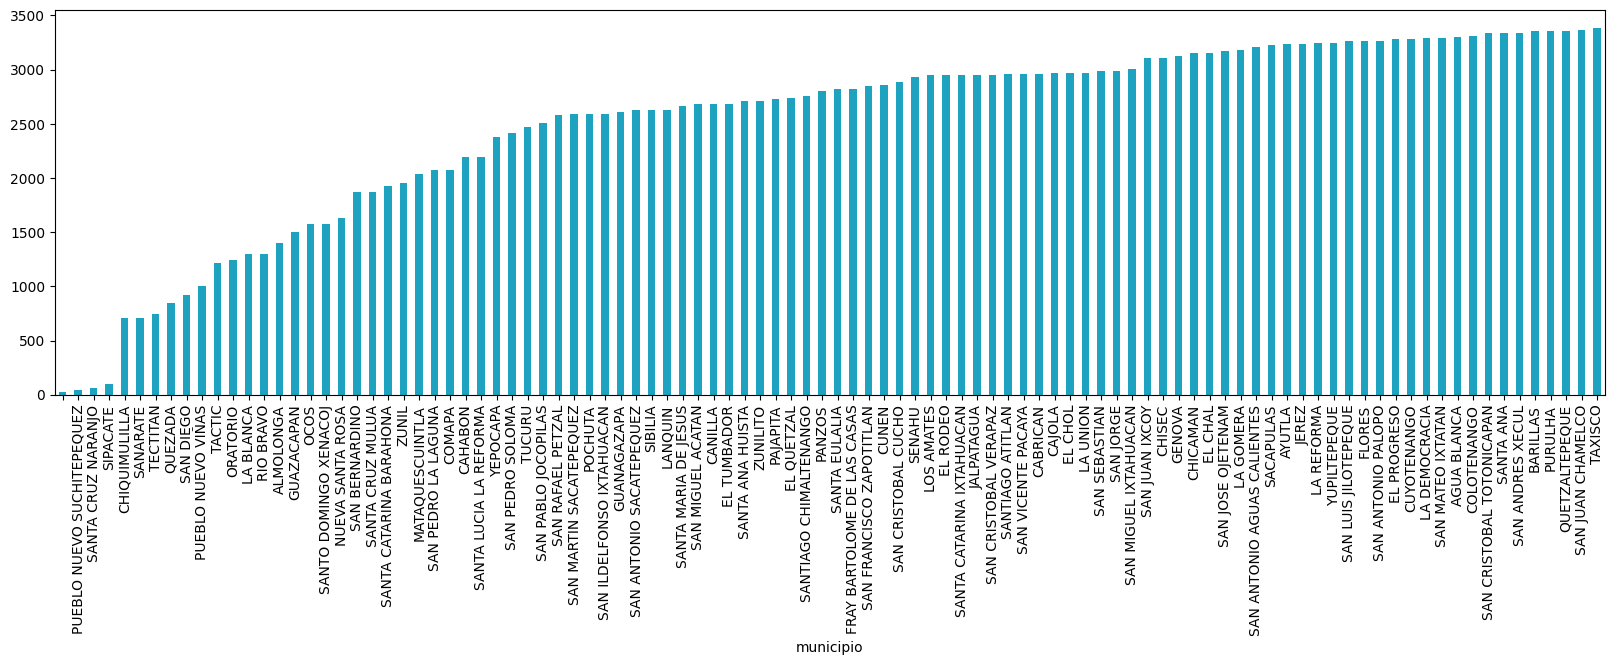

In [280]:
#MUNICIPIO VS ACUMULADO MUERTES ASCENDENTE

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    #'municipio',
    #'acumulado_muertes',
    'valor',
    'departamento',
    'poblacion'
    
    ], axis=1)

f1 = dc.drop_duplicates(subset=[ 'municipio', 'acumulado_muertes'])

f2 = f1.groupby('municipio')['acumulado_muertes'].max()

f2.sort_values(ascending=True).head(100).plot(kind='bar', color='#1da3c0' ,figsize=(20, 5))



plt.show()


Se puede observar que los primeros 100 municipios poseen un acumulado en muertes de entre 500 a 3500 para finales del ano 2020 ,donde el 50% mayor esta el acumulado en muertes
de 3000 a 3500 

#### MUNICIPIO VS ACUMULADO MUERTES DESCENDENTE 2.1.6

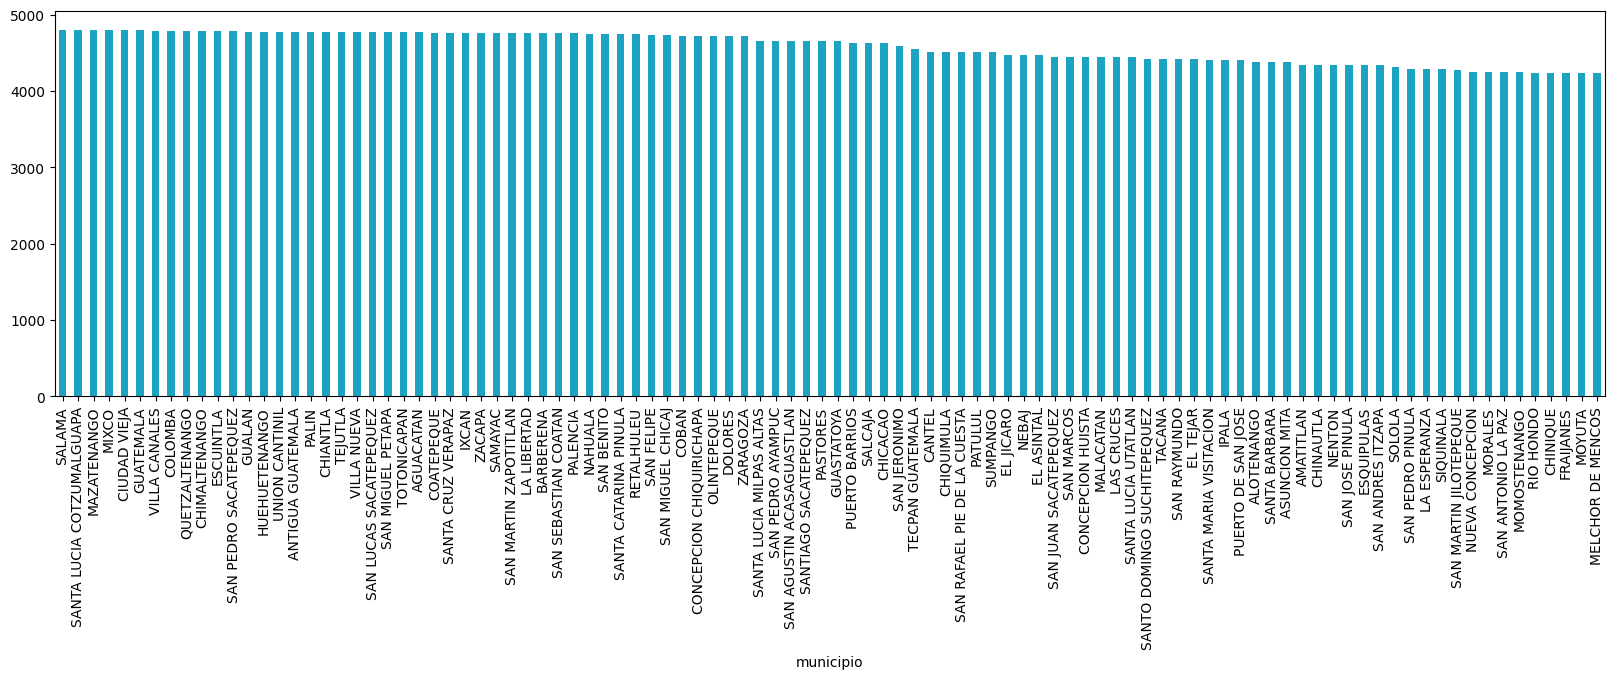

In [279]:
#MUNICIPIO VS ACUMULADO MUERTES DESCENDENTE

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    #'municipio',
    #'acumulado_muertes',
    'valor',
    'departamento',
    'poblacion'
    
    ], axis=1)


f1 = dc.drop_duplicates(subset=[ 'municipio', 'acumulado_muertes'])

f2 = f1.groupby('municipio')['acumulado_muertes'].max()

f2.sort_values(ascending=False).head(100).plot(kind='bar', color='#1da3c0' ,figsize=(20, 5))



plt.show()


tambien para lo siguientes valores de acumulado en muertes , los valores ya estan mas parejos y rondan de entre 4500 a 5000 , donde de igual forma entre los municipios que 
tiene mas muertes acumuladas , tambien son uno de los departamentos con mayor poblacion , por lo que ahi podemos ver de nuevo esa correlacion 

#### DEPARTAMENTO VS MUERTES ACUMULADAS 2.1.7

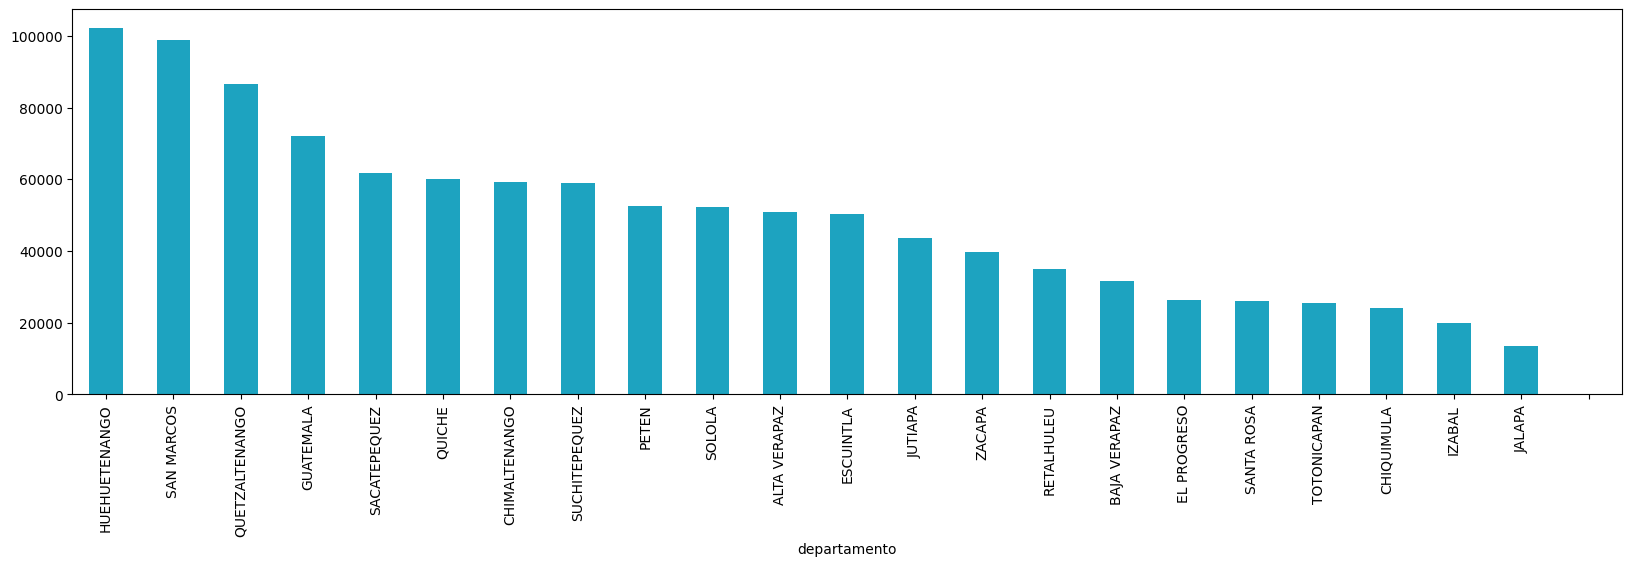

In [277]:
#DEPARTAMENTO VS MUERTES ACUMULADAS

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    #'municipio',
    #'acumulado_muertes',
    'valor',
    #'departamento',
    'poblacion'
    
    ], axis=1)

f1 = dc.drop_duplicates(subset=['municipio', 'departamento', 'acumulado_muertes'])

f2 = f1.groupby(['departamento','municipio'], as_index=False)['acumulado_muertes'].max()

f3 = f2.groupby(['departamento'])['acumulado_muertes'].sum()

f3.sort_values(ascending=False).head(100).plot(kind='bar', color='#1da3c0' ,figsize=(20, 5))



plt.show()


Para este analisis se puede ver que el departamento para ese ano con la mayor cantidad de muertes es huehuetenango ,seguido de san marcos  y luego quetzaltenango ,para este caso si 
no se relaciona mucho el tema de la poblacion con el numero de muertes acumulado ,guatemala que es el departamento con mayor poblacion esta en el 4to lugar 

### ANALISIS CORRELACIONALES 2.2

#### MATRIZ DE CORRELACION 2.2.1

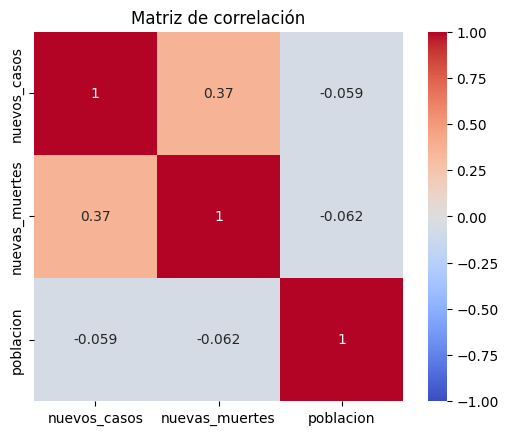

In [33]:
#MATRIZ DE CORRELACION 
#NUEVOS CASOS , NUEVAR MUERTES Y POBLACION

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    #'nuevos_casos',
    'acumulado_casos',
    #'nuevas_muertes',
    'municipio',
    'acumulado_muertes',
    'valor',
    'departamento'
    #'poblacion'
    
    ], axis=1)

f1 = dc.drop_duplicates(subset=[ 'nuevos_casos', 'nuevas_muertes' ,'poblacion'])

matriz_correlacion = f1.corr()

sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True
)

plt.title('Matriz de correlación')
plt.show()





Podemos ver que para la comparacion hecha , tenemos que nuevos casos se tiende a relacionar mas con nuevas muertes , tambien tenemos que la relacion entre nuevos casos y poblacion
esta debilmente relacionada para este caso y tambien lo que es poblacion y nuevas muertes 

#### MAPA DE CALOR 2.2.2

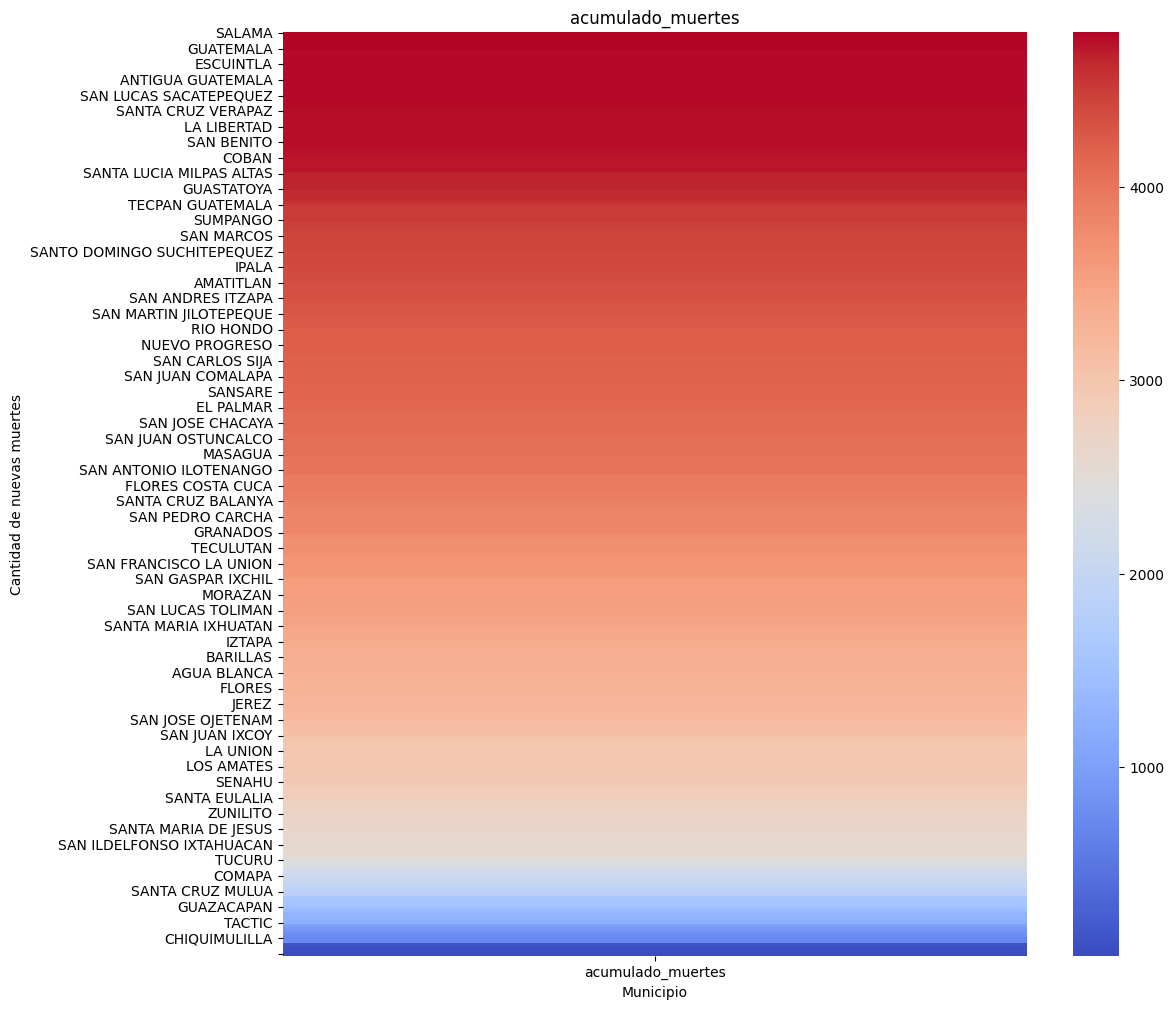

In [61]:
# MAPA DE CALOR

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    #'municipio',
    #'acumulado_muertes',
    'valor',
    'departamento',
    'poblacion'
    
    ], axis=1)


f1 = dc.drop_duplicates(subset=[ 'municipio', 'acumulado_muertes'])

f2 = f1.groupby('municipio', as_index=False)['acumulado_muertes'].max()

plt.figure(figsize=(12, 12))
sns.heatmap(f2.pivot_table(index='municipio', values='acumulado_muertes', aggfunc='sum').sort_values('acumulado_muertes',ascending=False), cmap='coolwarm')
plt.title('acumulado_muertes')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de nuevas muertes')
plt.show()


Para este analisis se pude ver la gran mayoria de departamentos representados tiene un alto valor con respecto a acumulado en muertes , de los municipios representados
solo 4 tienen un valor bajo en acumulado en muertes , que seria menor a 1000 , luego la mayoria esta por encima de los 2500 en adelante , por lo que si existe un alto indice de muertes acumuladas por municipio para ese ano seleccionado 

#### ANALISIS SPEARMAN , ACUMULADO MUERTES VS POBLACION 2.2.3

In [73]:
# ANALISIS SPEARMAN

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'municipio',
    #'acumulado_muertes',
    'valor',
    'departamento',
    #'poblacion'
    
    ], axis=1)


f1 = dc.drop_duplicates(subset=[ 'acumulado_muertes', 'poblacion'])

f2 = f1.groupby('poblacion', as_index=False)['acumulado_muertes'].max()

corr, p_value = spearmanr(f2['poblacion'] , f2['acumulado_muertes'])

print(f'Correlación de Spearman: {corr}')
print(f'Valor p: {p_value}')




Correlación de Spearman: 0.3992062003788216
Valor p: 7.257892455142801e-13


Para este caso nos indica que en la medida que crece las muertes acumuladas , tambien crece la poblacion o viceversa , se puede decir que van en el mismo sentido las dos variables
,no es una correlacion perfecta pero si van ambas en el mismo sentido , ademas de eso tambien podemos ver que el valor p es casi cero lo que indicaria que si es significativa esa correlacion entre las variables 

#### ANALISIS CORRELACION DE KENDALL , ACUMULADO CASOS VS POBLACION 2.2.4

In [79]:
# ANALISIS CORRELACION DE KENDALL

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    #'acumulado_casos',
    'nuevas_muertes',
    'municipio',
    'acumulado_muertes',
    'valor',
    'departamento',
    #'poblacion'
    
    ], axis=1)


f1 = dc.drop_duplicates(subset=[ 'acumulado_casos', 'poblacion'])

f2 = f1.groupby('poblacion', as_index=False)['acumulado_casos'].max()


# KENDALL
corr, p_value = kendalltau(f2['poblacion'] , f2['acumulado_casos'])

print(f'Correlación de Kendall: {corr}')
print(f'Valor p: {p_value}')



Correlación de Kendall: 0.27165898715681996
Valor p: 2.9782637636679108e-12


Para este caso , nos indica de nuevo la direccion de las dos variables , y ambas van en el mismo sentido si una crece la otra tambien , ademas de eso  podemos ver que esta correlacion es fuerte , porque el Valor p es casi cero por lo que esa relacion si es significativa para nuestro analisis

#### ANALISIS CHI CUADRADO , ACUMULADO CASOS VS POBLACION 2.2.5

In [78]:
# ANALISIS CHI CUADRADO

dc=copy.deepcopy(df)

dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    #'acumulado_casos',
    'nuevas_muertes',
    'municipio',
    'acumulado_muertes',
    'valor',
    'departamento',
    #'poblacion'
    
    ], axis=1)


f1 = dc.drop_duplicates(subset=[ 'acumulado_casos', 'poblacion'])

f2 = f1.groupby('poblacion', as_index=False)['acumulado_casos'].max()

chi2, p_value, dof, expected = chi2_contingency(f2)
print(f'Valor chi cuadrado: {chi2}')
print(f'Valor p: {p_value}')



Valor chi cuadrado: 7578570.327291215
Valor p: 0.0


Por ultimo tenemos el analisis de chi cuadrado , que nos indica que las variables tienen una fuerte relacion , ademas de que el valor p cero nos indica que se pueden obtener estos
valores por la relacion que tienen estos , tambien que la relacion entre ellos si es significativa 

## CONCLUSIONES

1) Para el grupo de datos analizado , tenemos que existe una clara relacion entre los casos de muertes nuevas con la poblacion , este aplica para un municipio individual
y tambien para un departamento ,entre mayor sea la poblacion en un municipio mayor es la cantidad de muertes nuevas ,ademas de eso tenemos que el municipio de guatemala es el que mayor poblacion tiene y asi mismo es el que tiene mayor numero de nuevas muertes registradas para el ano 2020

2) Para el caso de las muertes acumuladas por municipio y la poblacion de cada uno , se ve que no necesariamente el que tiene mayor numero de poblacion es el que tiene el mayor numero 
de muertes acumuladas , ya que como se muestra en una de las graficas el municipio con mayor cantidad de muertes es salama pero este no tiene la mayor poblacion , ya que el municipio
de mayor poblacion es guatemala y no salama , de igual forma si vemos los acumulados por departamento tampoco es guatemala quien tiene el mayor numero de muertes acumuladas , ya que como se
ve en la grafica es huehuetenango el que tiene el mayor numero de muertes seguido de san marcos y en tercero en quetzaltenango 

3) Tenemos que para los municipios pertenecientes al departamento de guatemala son los que mayor poblacion tienen , ya que como vemos en la grafica de poblacion vs municipio 
los municipios de guatemala , villanueva , mixco y un poco mas lejos villa canales son los que mas habitantes tienen , luego tenemos san pedro carcha y coban que pertenecen al departamento 
de altaverapaz que se encuentra como segundo en poblacion de departamentos , por lo que si los municipios puntean en cantidad de poblacion en la grafica de municipios , lo mas 
probable es que tambien sus departamentos lo hagan por simple suma de habitantes ,se puede concluir que los municipios que tienen mayor poblacion hay una alta probabilidad que sus
departamentos tambien lo sean con respecto a los otros

4) Con respecto a la distribucion de los datos de Nuevas Muertes como monovariable ,tenemos que los valores se distribuyeron principalmente de entre 0 a 23 ,
y si tomamos de base el valor maximo que es 60 , los datos estarian sesgados o concentrados mas hacia la izquierda , no tenemos mayores valores atipicos por lo que la distribucion de los datos
esta dentro de un rango normal de entre 0 a 60, se puede concluir que las nuevas muertes en promedio rondaron 23 por dia y en algunos momentos oscilaron poco hacia arriba o hacia abajo 

5) Con respecto a la distribucion de la poblacion de todos los municipios, tenemos que el 50% de los municipios tiene una poblacion menor a 50000 habitantes y el otro restante mayor a este,
pero en el analisis tenemos un valor atipico que sesga nuestra grafica , donde tenemos como minimo en poblacion 2000 habitantes y un maximo de 1.2 millones , y si el centro esta en 
50000, tenemos esa concentracion del lado izquierdo que del derecho , el valor de poblacion del municipio de guatemala nos afecta pues es el unico que tiene una poblacion mayor a 
un millon de habitantes ,si tuvieramos que tomar alguna medida mas representativa del grupo podemos omitir a guatemala ,con esto se concluye que guatemala es el unico municipio que tiene
una poblacion mayor a 1 millon de habitantes principalmente por ser la capital 